In [2]:
# iris 데이터 로드 및 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
import pandas as pd

In [6]:
iris_pd = pd.DataFrame(iris.data, columns=iris['feature_names'])
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

# KMeans객체 생성(클러스터 수 3)
km = KMeans(n_clusters=3, random_state=42)

# 학습하기
km.fit(iris_pd)

/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [9]:
# 레이블 확인
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
# 0, 1, 2에 해당되는 샘플의 개수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([49, 50, 51]))

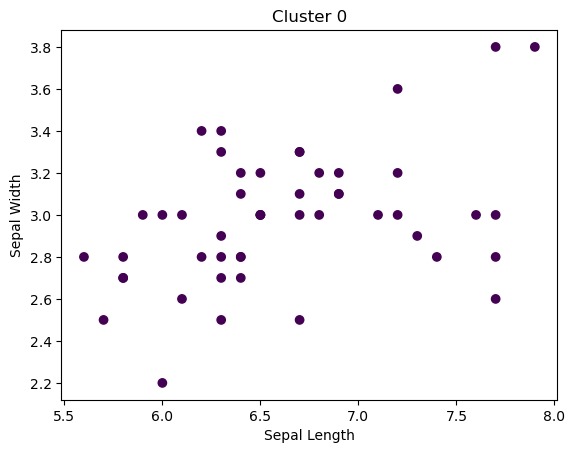

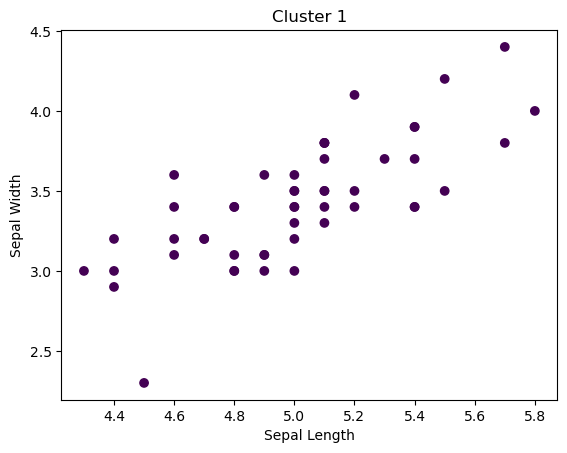

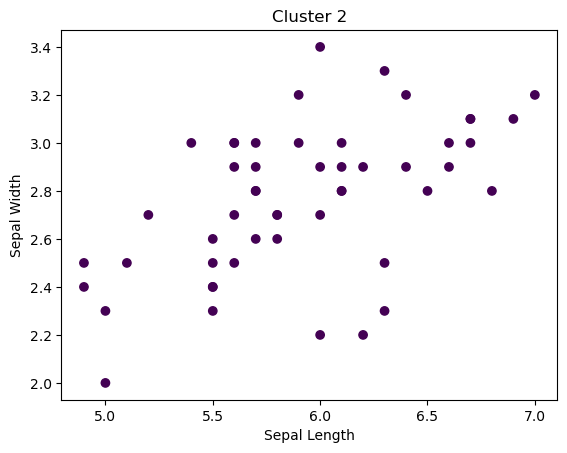

In [11]:
# 클러스터 별 스캐터 함수 만드는 함수
def draw_iris(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

# 클러스터 그리기
draw_iris(iris.data[km.labels_ == 0], km.labels_[km.labels_ == 0], "Cluster 0")
draw_iris(iris.data[km.labels_ == 1], km.labels_[km.labels_ == 1], "Cluster 1")
draw_iris(iris.data[km.labels_ == 2], km.labels_[km.labels_ == 2], "Cluster 2")

### 해석
- sepal 값을 기준으로 스캐터 그래프를 그려줌
- 각 클러스터 별 분포를 확인 할 수 있음

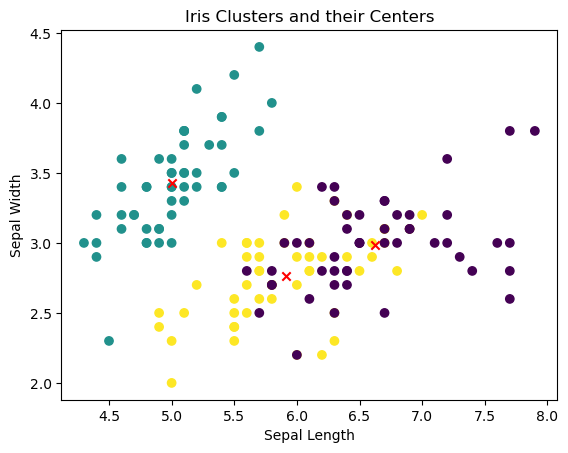

In [12]:
# 각 클러스터 별 중심 표시 및 분포 그리는 함수
def draw_iris(data, labels, centers, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')  # Plotting cluster centers
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

# 각 클러스터 별 중심 및 분포 그리기
draw_iris(iris.data, km.labels_, km.cluster_centers_, "Iris Clusters and their Centers")

#### 해석
- 녹색은 sepal 값으로 확연하게 구분이 가능
- 노란색과 보라색은 겹쳐 있어서 sepal 값으로 구분이 힘듬

In [13]:
iris_pd[100:101]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,2


In [14]:
# 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transfrom() 사용
km.transform(iris_pd[100:101])

array([[0.7774171 , 5.60042677, 2.40161662]])

In [15]:
# 예측하기
km.predict(iris_pd[100:101])

array([0], dtype=int32)

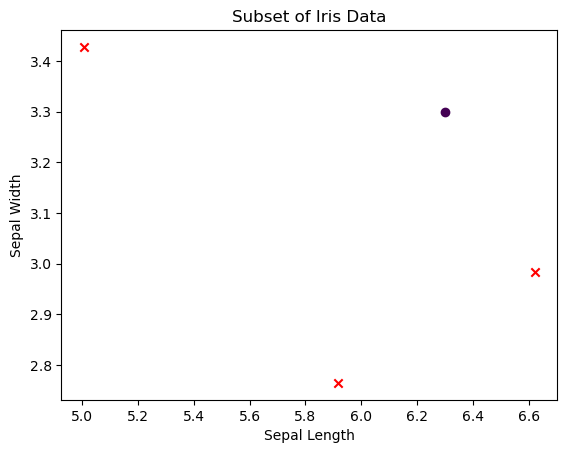

In [16]:
# 예측한 샘플이 맞는지 이미지로 출력하여 확인
draw_iris(iris_pd.iloc[100:101].values, km.labels_[100:101], km.cluster_centers_, "Subset of Iris Data")


In [17]:
# 중심을 찾기위해 반복수행한 횟수 확인
km.n_iter_

7

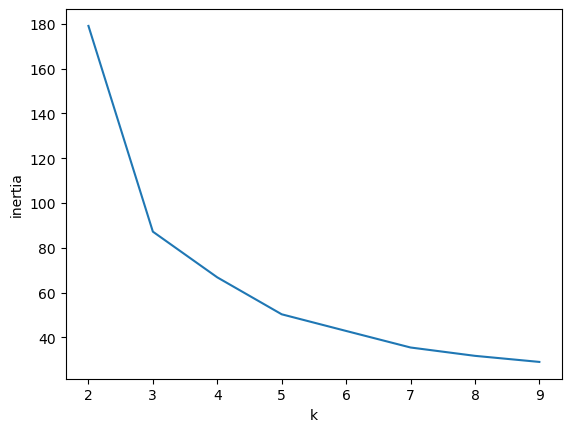

In [18]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init= 10)
    km.fit(iris_pd)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

#### 해석
- 뚜렸하게 꺾이는 지점 k = 3
- 현재 데이터에서 군집 분석을 하는 경우 KMeans k 값은 3이 최적